In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

# Scaling

Scaling just changes the range of your data. Normalization is a more radical transformation.



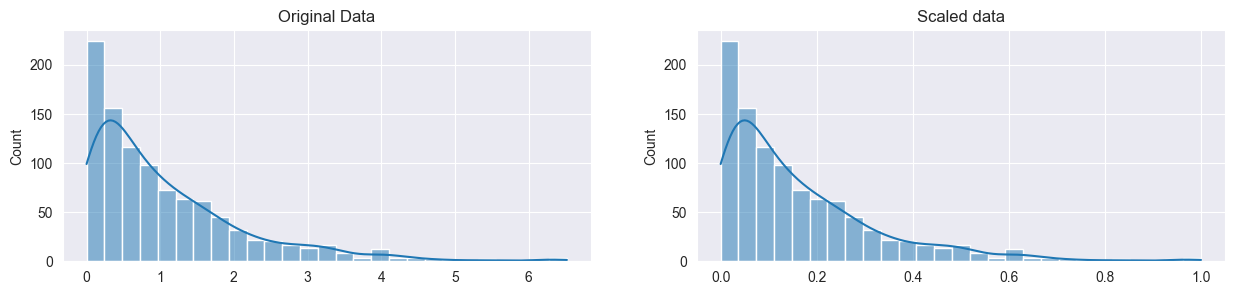

In [7]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [9]:
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")


original_goal_data = pd.DataFrame(kickstarters_2017.goal)
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

# Normalisation

The point of normalization is to change your observations so that they can be described as a normal distribution.

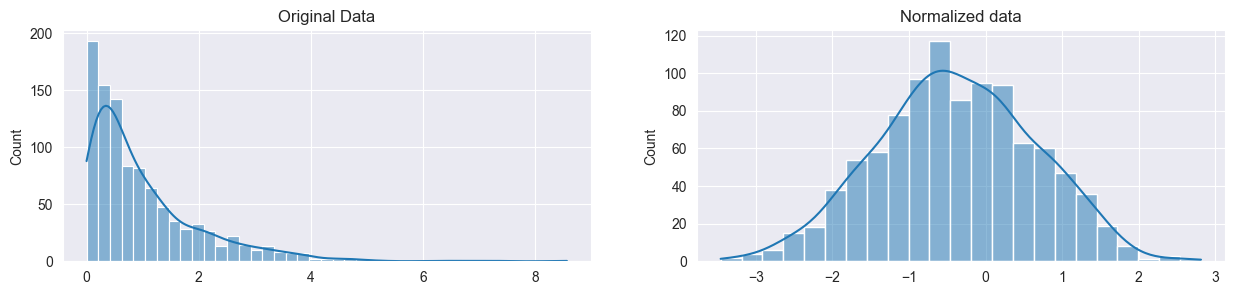

In [6]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Text(0.5, 1.0, 'Normalized data')

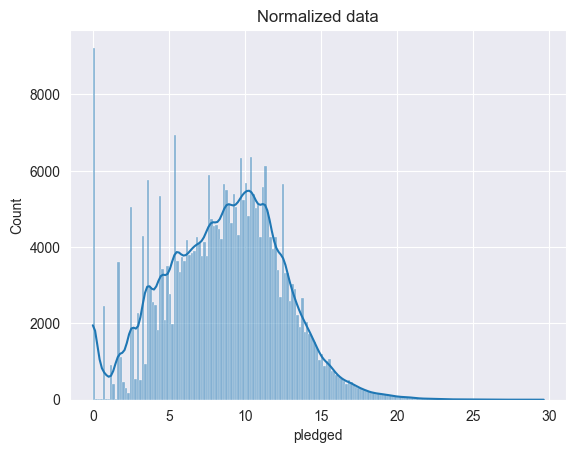

In [10]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges_only = kickstarters_2017.pledged.loc[index_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_values = pd.Series(stats.boxcox(positive_pledges_only)[0],
                              name='pledged', index=positive_pledges_only.index)

# plot normalized data
ax = sns.histplot(normalized_values, kde=True)
ax.set_title("Normalized data")